<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<html><font size=4><B>1. Κατασκευή γράφου και υπολογισμός μετρικών</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/maayan-pdzbase/"> KONECT (PDZBase) </a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$. Οι κόμβοι του γράφου αναπαριστούν πρωτεΐνες και οι ακμές την αλληλεπίδραση αυτών. Στην σελίδα <a href="http://konect.cc/networks/maayan-pdzbase/"> KONECT (PDZBase)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί.<BR></html>

In [ ]:
G = nx.read_edgelist("out.maayan-pdzbase", nodetype=int, create_using=nx.Graph()) # Η create_using = nx.Graph() εξασφαλίζει ότι θα φτιαχτεί undirected γράφος
print(G)

Graph with 212 nodes and 244 edges


Θα αφαιρέσουμε τα self loops

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))
print(G)

Graph with 212 nodes and 242 edges


 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [ ]:
G_node_count= G.number_of_nodes()
G_edge_count = G.number_of_edges()
G_connected_components= nx.number_connected_components(G)

print(f"Ο αριθμός των κόμβων είναι : {G_node_count}")
print(f"Ο αριθμός των ακμών είναι : {G_edge_count}")
print(f"Ο μέσος βαθμός των κόμβων είναι : {np.mean([degree[1] for degree in G.degree])}")
print(f"Ο αριθμός των συνεκτικών συνιστωσών είναι : {G_connected_components}")

Ο αριθμός των κόμβων είναι : 212
Ο αριθμός των ακμών είναι : 242
Ο μέσος βαθμός των κόμβων είναι : 2.2830188679245285
Ο αριθμός των συνεκτικών συνιστωσών είναι : 19


<li><B>2 Προεργασία για την πρόβλεψη συνδέσμων. 2(i). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [ ]:
unconnected_pairs = set()

for i in range(1, G_node_count):
    for j in range(i+1, G_node_count + 1):
        if not G.has_edge(i, j):
            unconnected_pairs.add((i, j))

print(f"Το σύνολο των ασύνδετων ζευγών κόμβων είναι : {unconnected_pairs}")
print(f"Υπάρχουν {len(unconnected_pairs)} ασύνδετα ζεύγη κόμβων στο γράφο")

Το σύνολο των ασύνδετων ζευγών κόμβων είναι : {(16, 93), (53, 160), (69, 104), (129, 155), (44, 47), (71, 150), (7, 165), (48, 166), (23, 109), (9, 211), (83, 160), (124, 161), (60, 176), (25, 155), (99, 104), (2, 171), (76, 120), (136, 171), (18, 115), (37, 165), (78, 166), (55, 182), (113, 160), (154, 161), (30, 125), (90, 176), (131, 177), (106, 120), (166, 171), (17, 48), (143, 187), (108, 166), (85, 182), (101, 126), (120, 176), (161, 177), (8, 120), (173, 187), (24, 64), (84, 115), (115, 182), (1, 80), (3, 126), (168, 193), (38, 120), (79, 121), (54, 64), (31, 80), (17, 182), (58, 183), (91, 131), (33, 126), (10, 142), (109, 121), (26, 86), (12, 188), (86, 137), (61, 80), (88, 183), (121, 131), (24, 198), (65, 199), (63, 126), (40, 142), (100, 193), (141, 194), (77, 209), (56, 86), (42, 188), (116, 137), (176, 188), (19, 204), (93, 153), (68, 96), (54, 198), (95, 199), (70, 142), (130, 193), (171, 194), (47, 158), (107, 209), (148, 210), (32, 35), (49, 204), (123, 153), (183, 204

<li><B>2(ii).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [ ]:
removable_edges = set()

G_copy = G.copy()

for edge in G.edges():
  G_copy.remove_edge(edge[0], edge[1])
  if nx.number_connected_components(G_copy) == G_connected_components and G_copy.number_of_nodes() == G_node_count:
    removable_edges.add(edge)
  else:
    G_copy.add_edge(edge[0], edge[1])

print(f"To σύνολο των ακμών που μπορούν να αφαιρεθούν είναι : {removable_edges}")
print(f"Υπάρχουν {len(removable_edges)} ακμές που μπορούν να αφαιρεθούν από το γράφο")

To σύνολο των ακμών που μπορούν να αφαιρεθούν είναι : {(14, 62), (21, 19), (14, 190), (45, 19), (14, 16), (159, 47), (45, 37), (21, 37), (19, 18), (19, 15), (9, 11), (34, 159), (20, 60), (147, 124), (114, 8), (14, 43), (20, 187), (19, 106), (116, 115), (40, 147), (26, 38), (14, 18), (34, 146), (2, 114), (19, 20), (114, 129), (14, 106), (179, 134), (23, 179), (71, 18), (114, 141), (3, 57), (7, 21), (21, 14), (114, 144), (5, 112), (71, 146), (34, 127), (45, 14), (9, 116), (144, 148), (14, 20), (13, 61), (5, 23), (19, 16), (23, 32), (14, 84), (8, 19), (19, 101)}
Υπάρχουν 49 ακμές που μπορούν να αφαιρεθούν από το γράφο


<li><B>2(iii).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 2(i) και 2(ii) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>2(iv).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 2(ii). <BR>
    <li><B>2(v).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [ ]:
#dataframe of removable edges (they will function as positive samples)
removable_edges_df = pd.DataFrame(removable_edges, columns=['Node 1', 'Node 2'])
removable_edges_df['Link'] = 1


#dataframe of unconnected node pairs (they will function as negative samples)
unconnected_pairs_df = pd.DataFrame(unconnected_pairs, columns=['Node 1', 'Node 2'])
unconnected_pairs_df['Link'] = 0


#merge in one dataframe
df = pd.concat([removable_edges_df, unconnected_pairs_df], ignore_index=True)

#build graph G'=G_reduced
G_reduced = G.copy()
G_reduced.remove_edges_from(removable_edges)

In [ ]:
G_reduced_node_count= G_reduced.number_of_nodes()
G_reduced_edge_count = G_reduced.number_of_edges()
G_reduced_connected_components= nx.number_connected_components(G_reduced)

print(f"Ο αριθμός των κόμβων είναι : {G_reduced_node_count}")
print(f"Ο αριθμός των ακμών είναι : {G_reduced_edge_count}")
print(f"Ο μέσος βαθμός των κόμβων είναι : {np.mean([degree[1] for degree in G_reduced.degree])}")
print(f"Ο αριθμός των συνεκτικών συνιστωσών είναι : {G_reduced_connected_components}")

Ο αριθμός των κόμβων είναι : 212
Ο αριθμός των ακμών είναι : 193
Ο μέσος βαθμός των κόμβων είναι : 1.820754716981132
Ο αριθμός των συνεκτικών συνιστωσών είναι : 19


<html><font size=4><B>3. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>3(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων:
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [ ]:
#!pip install node2vec
from node2vec import Node2Vec
import multiprocessing

In [ ]:
node2vec_walker = Node2Vec(G_reduced, dimensions=128, p=1, q=1, walk_length=80, num_walks=10, workers=multiprocessing.cpu_count())
n2v_model = node2vec_walker.fit(window=10, min_count=1)

Computing transition probabilities: 100%|██████████| 212/212 [00:00<00:00, 7495.57it/s]


<html><font>
    <li><B>3(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>3(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [ ]:
x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df["Node 1"], df["Node 2"])]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, df["Link"], random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Το accuracy του μοντέλου είναι : {accuracy_score(y_test, y_pred)}")

Το accuracy του μοντέλου είναι : 0.9976551226551227


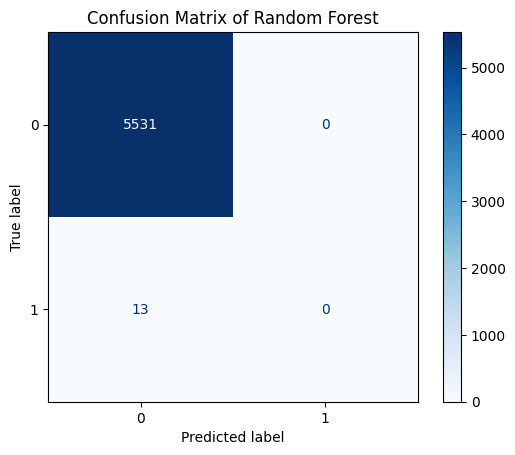

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix of Random Forest')
plt.show()

Εδώ βλέπουμε πως παρόλο που το accuracy είναι πολύ υψηλό, ο ταξινομητής δεν τα έχει πάει καθόλου καλά. Το υψηλό accuracy οφείλεται στο ότι στο test set έχουμε 5531 unconnected pairs και μόλις 13 removable edges, και αυτό που έκανε ο ταξινομητής είναι απλά να ταξινομήσει όλες τις παρατηρήσεις στην κλάση 0. Δηλαδή ο ταξινομητής δεν αναγνώρισε καμία "μελλοντική" σύνδεση.

 Προφανώς αυτή η ταξινόμηση είναι ανούσια και αναιρεί όλη την δουλειά που έχουμε κάνει προηγουμένως.Οπότε είτε πρέπει να προσπαθήσουμε να βρούμε έναν καταλληλότερο ταξινομητή είτε να αναθεωρήσουμε κάποιο από τα βήματα που κάναμε παραπάνω.